In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind
import scipy.stats as stats

import pymysql
from sqlalchemy import create_engine



In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from db_tools import fetch_data

df = fetch_data()
display(df)


✅ Connected to MySQL successfully using pymysql.
➡️ Retrieved 5 rows × 18 columns


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,750.0,49.99,320.0,11427.20,15346.93,12947.41,307.0,242.15,62.39,3919.73,25.540808,0.959375,1.343018
1,4466,AMERICAN VINTAGE BEVERAGE,5255,TGI Fridays Ultimte Mudslide,9.35,1750.0,12.99,6215.0,58110.25,79187.04,51180.60,6096.0,11204.28,793.91,21076.79,26.616464,0.980853,1.362703
2,4466,AMERICAN VINTAGE BEVERAGE,5215,TGI Fridays Long Island Iced,9.41,1750.0,12.99,4923.0,46325.43,60416.49,41542.02,4651.0,8548.96,793.91,14091.06,23.323202,0.944749,1.304175
3,480,BACARDI USA INC,3348,Bombay Sapphire Gin,22.38,1750.0,29.99,57349.0,1283470.62,1766391.12,460087.95,56888.0,104524.54,89286.27,482920.50,27.339387,0.991961,1.376261
4,480,BACARDI USA INC,8358,Bacardi 151 Proof,14.49,750.0,19.99,7071.0,102458.79,161219.35,87396.28,8065.0,6352.66,89286.27,58760.56,36.447585,1.140574,1.573504


In [4]:
df.describe()

,VendorNumber,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1999.400000,6117.600000,18.268000,1350.000000,25.190000,15175.600000,3.003585e+05,4.165122e+05,130630.852000,15201.400000,26174.518000,36044.550000,116153.728000,27.853489,1.003503,1.391932
std,2256.885863,2208.682481,11.106305,547.722558,15.514509,23719.070488,5.505388e+05,7.564512e+05,186084.498743,23477.453148,43985.474968,48603.735906,206073.241483,5.037981,0.078794,0.105074
min,105.000000,3348.000000,9.350000,750.000000,12.990000,320.000000,1.142720e+04,1.534693e+04,12947.410000,307.000000,242.150000,62.390000,3919.730000,23.323202,0.944749,1.304175
25%,480.000000,5215.000000,9.410000,750.000000,12.990000,4923.000000,4.632543e+04,6.041649e+04,41542.020000,4651.000000,6352.660000,793.910000,14091.060000,25.540808,0.959375,1.343018
50%,480.000000,5255.000000,14.490000,1750.000000,19.990000,6215.000000,5.811025e+04,7.918704e+04,51180.600000,6096.000000,8548.960000,793.910000,21076.790000,26.616464,0.980853,1.362703
75%,4466.000000,8358.000000,22.380000,1750.000000,29.990000,7071.000000,1.024588e+05,1.612194e+05,87396.280000,8065.000000,11204.280000,89286.270000,58760.560000,27.339387,0.991961,1.376261
max,4466.000000,8412.000000,35.710000,1750.000000,49.990000,57349.000000,1.283471e+06,1.766391e+06,460087.950000,56888.000000,104524.540000,89286.270000,482920.500000,36.447585,1.140574,1.573504


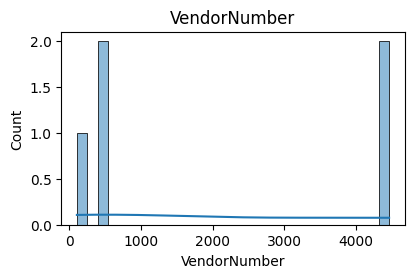

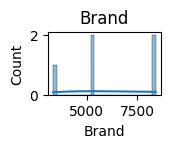

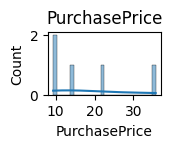

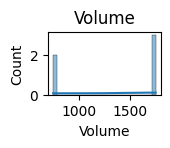

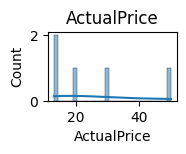

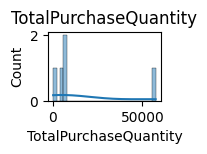

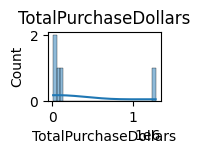

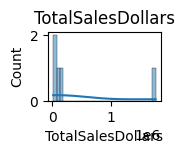

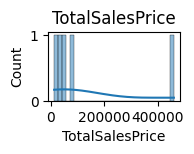

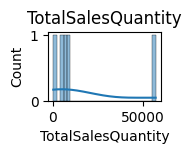

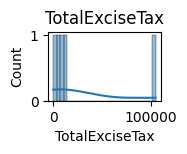

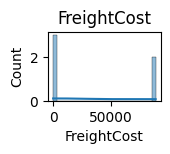

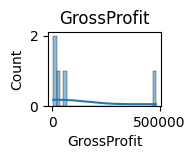

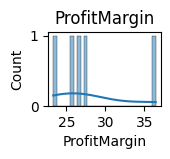

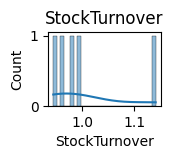

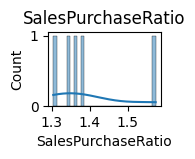

In [5]:
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()
    

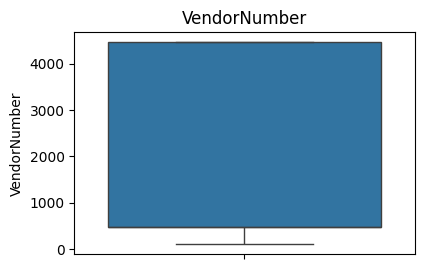

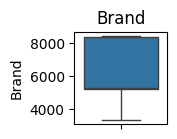

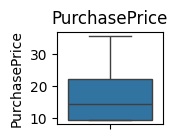

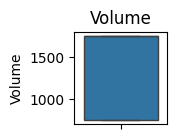

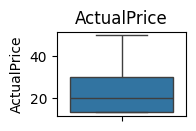

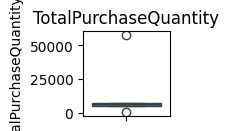

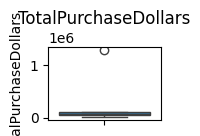

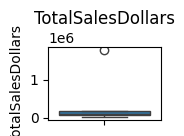

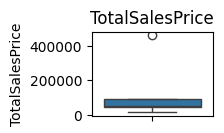

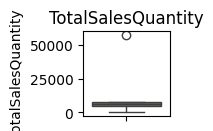

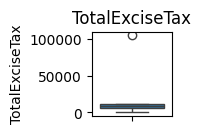

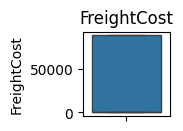

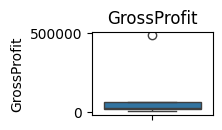

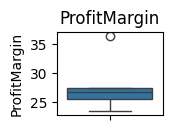

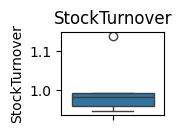

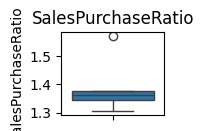

In [6]:
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [7]:
from db_tools import fetch_data

query = """
SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
  AND ProfitMargin > 0
  AND TotalSalesQuantity > 0
"""

df = fetch_data(query)
display(df)


✅ Connected to MySQL successfully using pymysql.
➡️ Retrieved 8565 rows × 18 columns


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,750.0,49.99,320.0,11427.20,15346.93,12947.41,307.0,242.15,62.39,3919.73,25.540808,0.959375,1.343018
1,4466,AMERICAN VINTAGE BEVERAGE,5255,TGI Fridays Ultimte Mudslide,9.35,1750.0,12.99,6215.0,58110.25,79187.04,51180.60,6096.0,11204.28,793.91,21076.79,26.616464,0.980853,1.362703
2,4466,AMERICAN VINTAGE BEVERAGE,5215,TGI Fridays Long Island Iced,9.41,1750.0,12.99,4923.0,46325.43,60416.49,41542.02,4651.0,8548.96,793.91,14091.06,23.323202,0.944749,1.304175
3,480,BACARDI USA INC,3348,Bombay Sapphire Gin,22.38,1750.0,29.99,57349.0,1283470.62,1766391.12,460087.95,56888.0,104524.54,89286.27,482920.50,27.339387,0.991961,1.376261
4,480,BACARDI USA INC,8358,Bacardi 151 Proof,14.49,750.0,19.99,7071.0,102458.79,161219.35,87396.28,8065.0,6352.66,89286.27,58760.56,36.447585,1.140574,1.573504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,8004,SAZERAC CO INC,2014,Weller Rsv Special Barrel,18.39,750.0,22.99,420.0,7723.80,10027.82,1991.17,418.0,329.09,50293.62,2304.02,22.976280,0.995238,1.298301
8561,9552,M S WALKER INC,2612,Four Roses Small Batch 15,71.99,750.0,89.99,24.0,1727.76,2159.76,539.94,24.0,18.89,55551.82,432.00,20.002222,1.000000,1.250035
8562,4425,MARTIGNETTI COMPANIES,2328,Michter's 20 YO Bourbon,406.01,750.0,539.99,5.0,2030.05,2699.95,2159.96,5.0,3.94,144929.24,669.90,24.811571,1.000000,1.329992
8563,8112,MOET HENNESSY USA INC,13581,Veuve Clicquot Rose Shop Bag,33.11,750.0,49.99,487.0,16124.57,20345.93,5248.95,407.0,45.68,48347.26,4221.36,20.747933,0.835729,1.261797


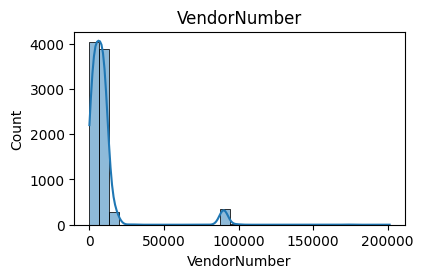

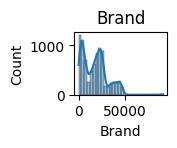

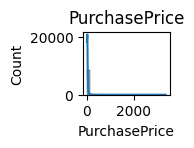

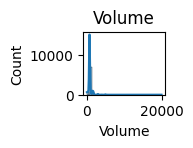

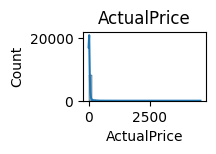

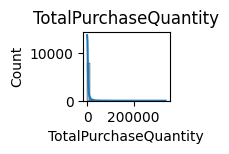

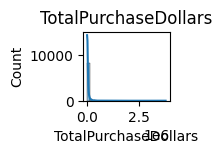

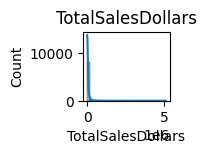

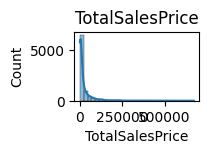

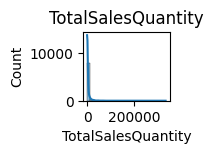

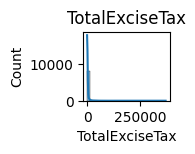

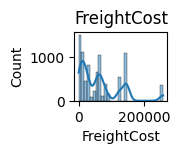

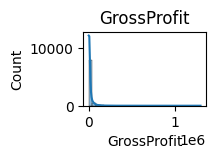

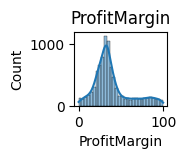

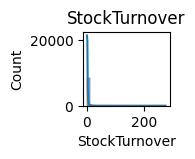

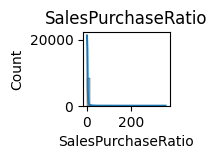

In [8]:
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

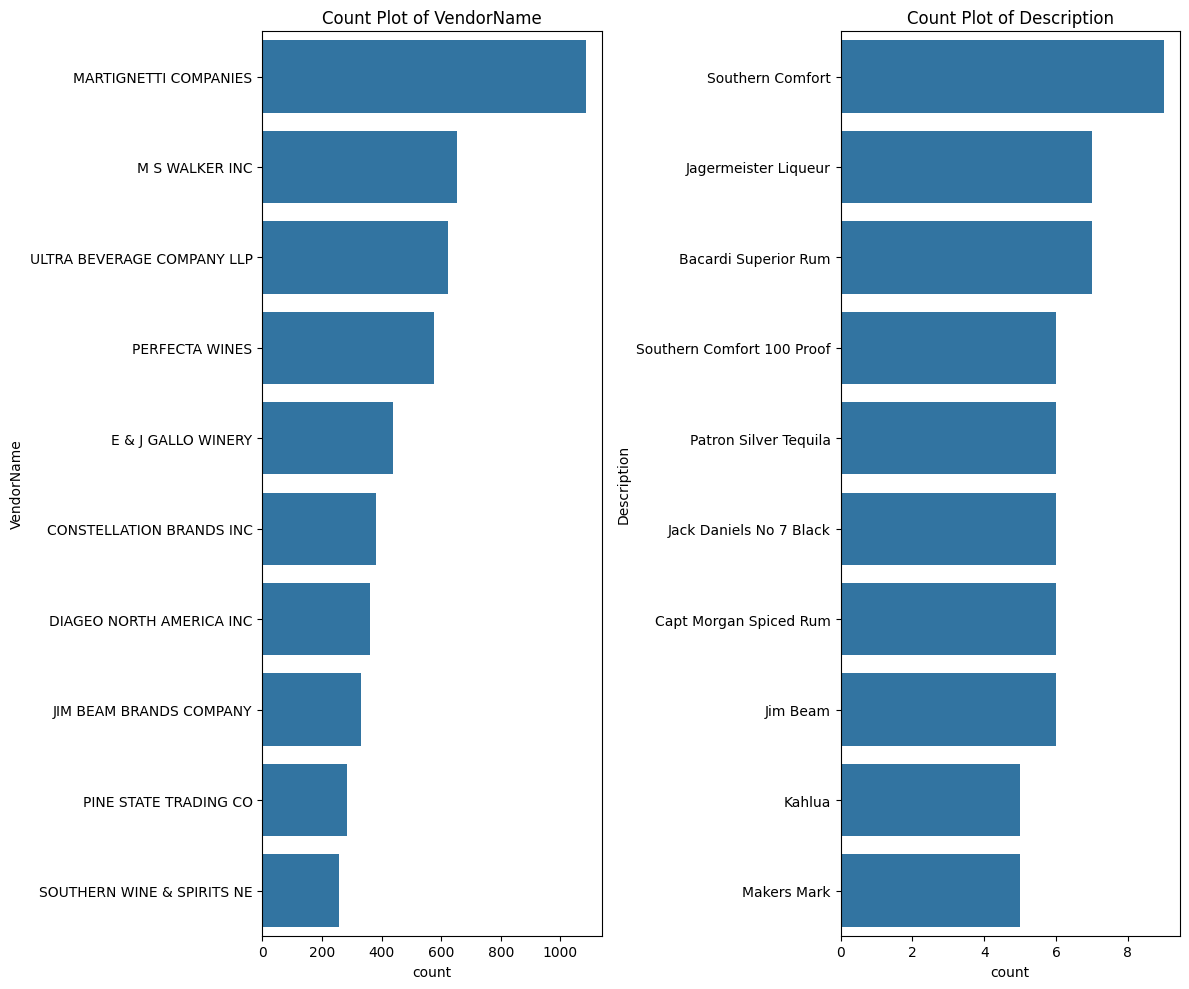

In [9]:
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
    plt.tight_layout()

plt.show()


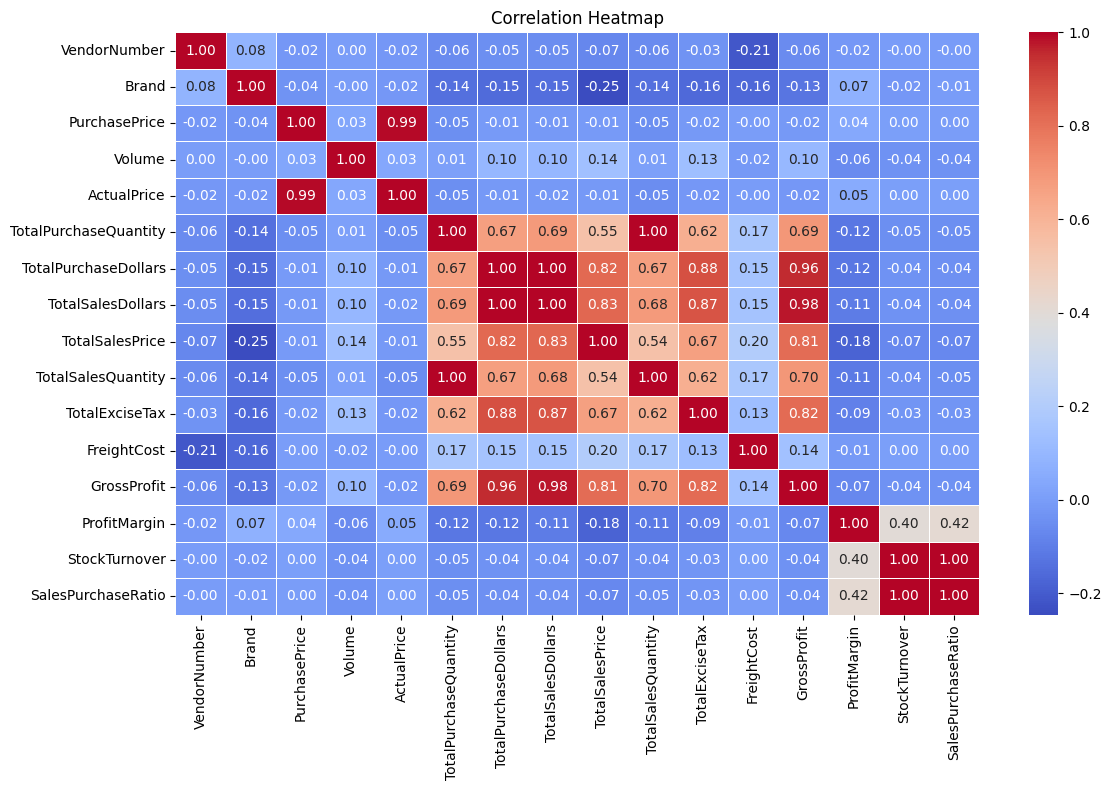

In [10]:
plt.figure(figsize=(12, 8))

correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [11]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
'ProfitMargin':'mean'}).reset_index()
display(brand_performance)

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [12]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
display(low_sales_threshold,high_margin_threshold)

np.float64(560.299)

np.float64(64.97017552750111)

In [14]:
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    ]
print("Brands with low sales but high margin")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

Low Sales Threshold (15th percentile): 263.76
High Profit Margin Threshold (85th percentile): 79.554449988222
Target brands found: 39


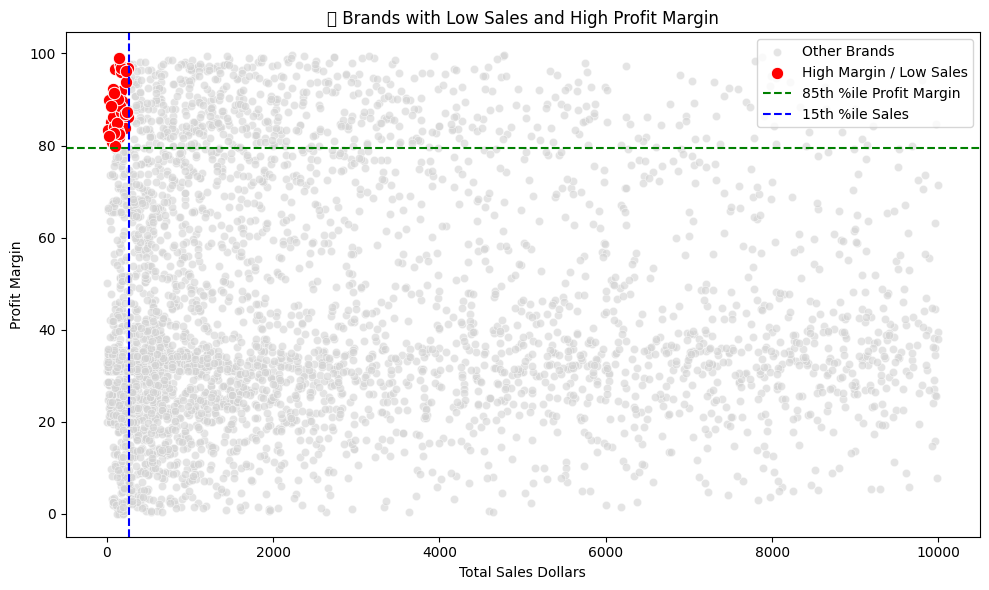

In [16]:

low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]


print(f"Low Sales Threshold (15th percentile): {low_sales_threshold}")
print(f"High Profit Margin Threshold (85th percentile): {high_margin_threshold}")
print(f"Target brands found: {target_brands.shape[0]}")


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='lightgray',
    alpha=0.6,
    label='Other Brands'
)
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='red',
    s=80,
    label='High Margin / Low Sales'
)


for _, row in target_brands.iterrows():
    plt.text(
        row['TotalSalesDollars'],
        row['ProfitMargin'],
        str(row.get('BrandName', '')),
        fontsize=8,
        ha='right',
        va='bottom'
    )

# --- Threshold Lines ---
plt.axhline(high_margin_threshold, color='green', linestyle='--', label='85th %ile Profit Margin')
plt.axvline(low_sales_threshold, color='blue', linestyle='--', label='15th %ile Sales')

# --- Aesthetic Tweaks ---
plt.title("📉 Brands with Low Sales and High Profit Margin")
plt.xlabel("Total Sales Dollars")
plt.ylabel("Profit Margin")
plt.legend()
plt.tight_layout()



plt.show()


In [17]:
def format_dollars(x):
    abs_x = abs(x)
    if abs_x >= 1_000_000_000:
        return f"${x/1_000_000_000:.2f}B"
    elif abs_x >= 1_000_000:
        return f"${x/1_000_000:.2f}M"
    elif abs_x >= 1_000:
        return f"${x/1_000:.2f}K"
    else:
        return f"${x:.2f}"


In [18]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

In [20]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [21]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      $67.99M
MARTIGNETTI COMPANIES         $39.33M
PERNOD RICARD USA             $32.06M
JIM BEAM BRANDS COMPANY       $31.42M
BACARDI USA INC               $24.85M
CONSTELLATION BRANDS INC      $24.22M
E & J GALLO WINERY            $18.40M
BROWN-FORMAN CORP             $18.25M
ULTRA BEVERAGE COMPANY LLP    $16.50M
M S WALKER INC                $14.71M
Name: TotalSalesDollars, dtype: object

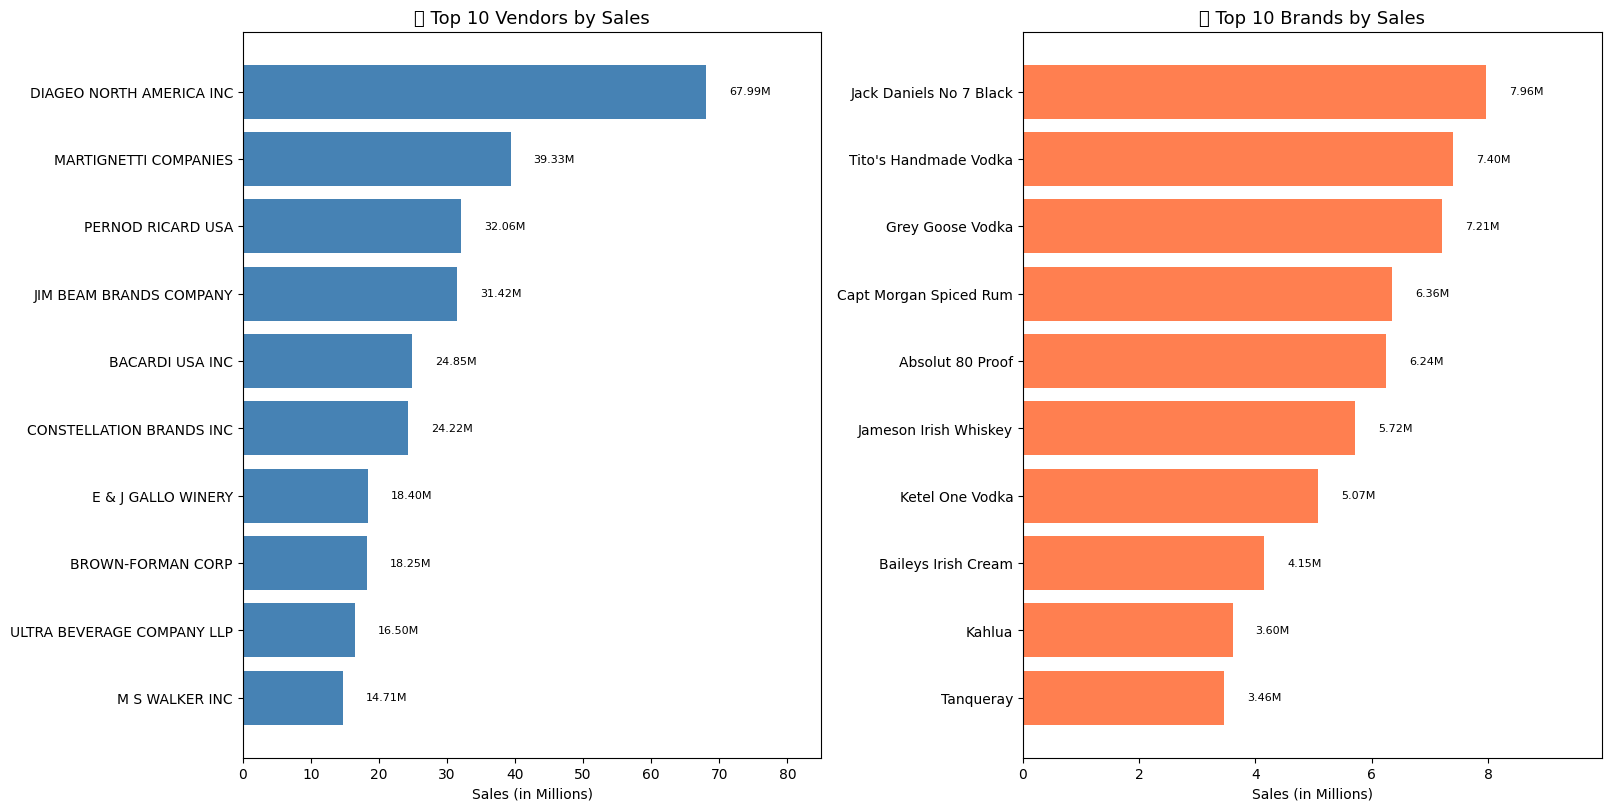

In [22]:

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

top_vendors_m = top_vendors / 1_000_000
top_brands_m = top_brands / 1_000_000

# Set plot style
plt.style.use("seaborn-v0_8-muted")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), constrained_layout=True)

# Vendor Chart
axs[0].barh(top_vendors_m.index[::-1], top_vendors_m.values[::-1], color='steelblue')
axs[0].set_title("🏢 Top 10 Vendors by Sales", fontsize=13)
axs[0].set_xlabel("Sales (in Millions)")
axs[0].set_xlim(0, top_vendors_m.max() * 1.25)
for i, val in enumerate(top_vendors_m.values[::-1]):
    axs[0].text(val + 0.05 * top_vendors_m.max(), i, f"{val:.2f}M", va='center', fontsize=8)

# Brand Chart
axs[1].barh(top_brands_m.index[::-1], top_brands_m.values[::-1], color='coral')
axs[1].set_title("🍾 Top 10 Brands by Sales", fontsize=13)
axs[1].set_xlabel("Sales (in Millions)")
axs[1].set_xlim(0, top_brands_m.max() * 1.25)
for i, val in enumerate(top_brands_m.values[::-1]):
    axs[1].text(val + 0.05 * top_brands_m.max(), i, f"{val:.2f}M", va='center', fontsize=8)

# Display both charts
plt.show()


In [23]:
vendor_performance =df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [24]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:


vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [26]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18


In [27]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [28]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30,24.60
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64,40.00
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97,50.64
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31,54.95
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63,62.51
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18,65.69


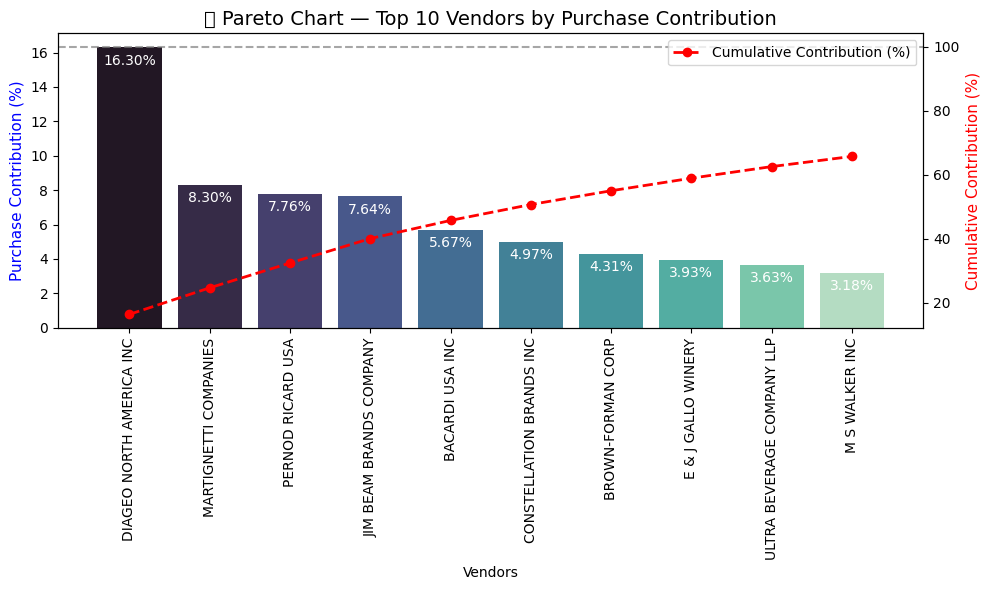

In [29]:


fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot: Individual contribution
sns.barplot(
    x='VendorName',
    y='PurchaseContribution%',
    data=top_vendors,
    palette='mako',
    ax=ax1
)

# Annotate values inside bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(
        i,
        value - 1,
        f"{value:.2f}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line plot: Cumulative contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    linewidth=2,
    label='Cumulative Contribution (%)'
)

# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_xlabel("Vendors")
ax1.set_ylabel("Purchase Contribution (%)", fontsize=11, color='blue')
ax2.set_ylabel("Cumulative Contribution (%)", fontsize=11, color='red')
ax1.set_title("📈 Pareto Chart — Top 10 Vendors by Purchase Contribution", fontsize=14)

# Reference line & legend
ax2.axhline(y=100, color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [30]:
print(f"Total Purchase contribution of the top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase contribution of the top 10 vendors is 65.69%


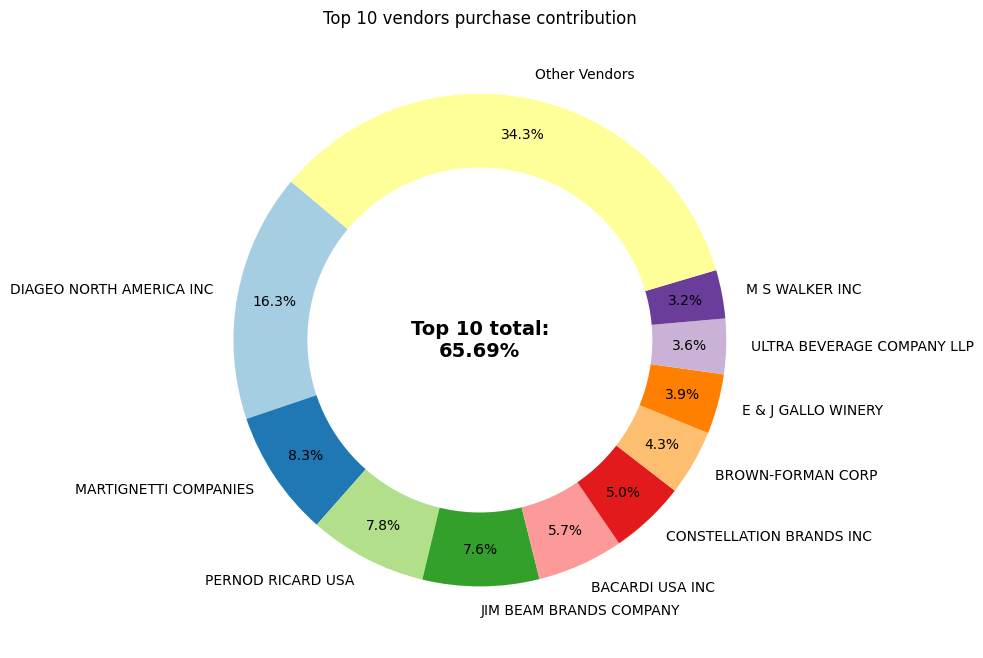

In [31]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100-total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#donout chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct="%1.1f%%",
    startangle = 140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0,f"Top 10 total:\n{total_contribution:.2f}%",fontsize = 14, fontweight = 'bold',ha = 'center',va = 'center')

plt.title("Top 10 vendors purchase contribution")
plt.show()

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']  / df['TotalPurchaseQuantity']

In [33]:
df['OrderSize'] = pd.qcut( df['TotalPurchaseQuantity'],q = 3,labels = ["small", "medium", "large"])

In [34]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,medium,320.0
1,large,6215.0
2,large,4923.0
3,large,57349.0
4,large,7071.0
...,...,...
8560,medium,420.0
8561,small,24.0
8562,small,5.0
8563,medium,487.0


In [35]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.057543
medium,15.486414
large,10.777625


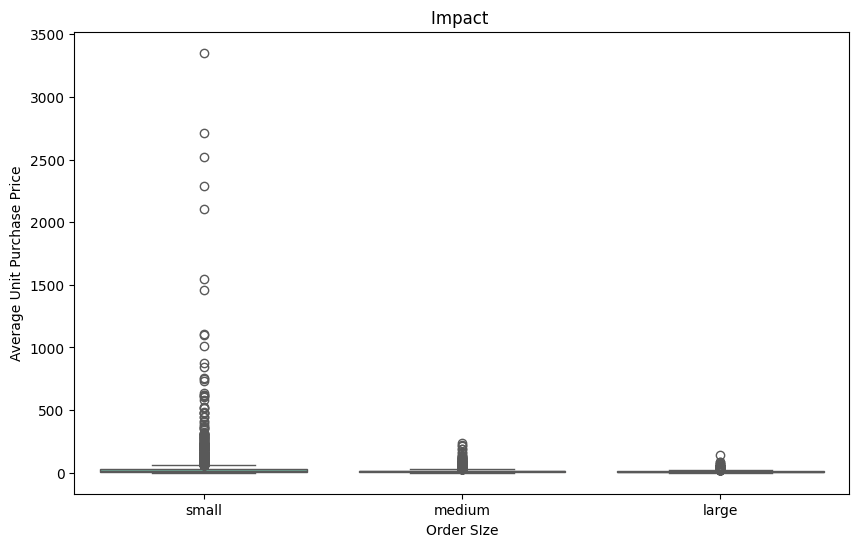

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df,x = "OrderSize",y = "UnitPurchasePrice",palette = "Set2")
plt.title("Impact ")
plt.xlabel("Order SIze")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [37]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [38]:
df['UnsoldInventoryValue'] =( df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: $2.71M


In [40]:
inventory_values_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_values_per_vendor = inventory_values_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_values_per_vendor["UnsoldInventoryValue"] = inventory_values_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_values_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
30,E & J GALLO WINERY,$228.28K
79,SAZERAC CO INC,$198.44K
11,BROWN-FORMAN CORP,$177.73K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K


In [42]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [47]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_threshold] ["ProfitMargin"].dropna()
low_vendors


2375    65.457413
2507    96.342710
2575    88.495772
2639    96.207190
2682    72.275322
          ...    
8552    31.029619
8553    34.667620
8556    35.056273
8559    33.355570
8564    35.081030
Name: ProfitMargin, Length: 2142, dtype: float64

In [46]:
top_vendors

1       26.616464
2       23.323202
3       27.339387
4       36.447585
6       25.894853
          ...    
8288    31.796057
8354    45.396739
8356    31.430525
8380     7.056281
8532    11.924160
Name: ProfitMargin, Length: 2142, dtype: float64

In [48]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


top vendors 95% CI: (30.74,31.61),Mean : 31.17
low vendors 95% CI: (40.48,42.62),Mean : 41.55


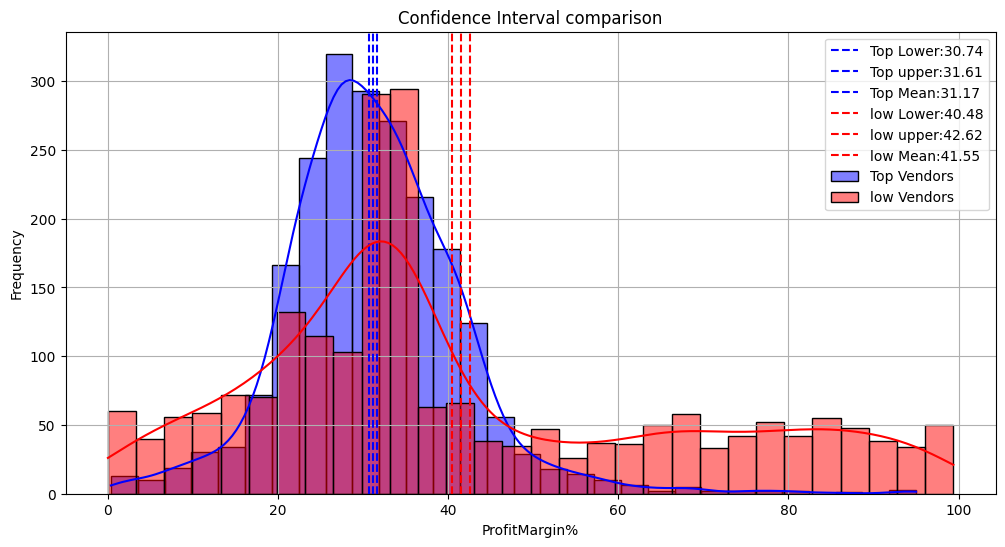

In [57]:
top_mean,top_lower,top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper = confidence_interval(low_vendors)

print(f"top vendors 95% CI: ({top_lower:.2f},{top_upper:.2f}),Mean : {top_mean:.2f}")
print(f"low vendors 95% CI: ({low_lower:.2f},{low_upper:.2f}),Mean : {low_mean:.2f}")
plt.figure(figsize=(12,6))

sns.histplot(top_vendors,kde = True,color = "blue",bins = 30,alpha = 0.5,label = "Top Vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label = f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label = f"Top upper:{top_upper:.2f}")
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean:{top_mean:.2f}')


sns.histplot(low_vendors,kde = True,color = "red",bins = 30,alpha = 0.5,label = "low Vendors")
plt.axvline(low_lower,color="red",linestyle="--",label = f"low Lower:{low_lower:.2f}")
plt.axvline(low_upper,color="red",linestyle="--",label = f"low upper:{low_upper:.2f}")
plt.axvline(low_mean, color='red', linestyle='--', label=f'low Mean:{low_mean:.2f}')

plt.title("Confidence Interval comparison")
plt.xlabel("ProfitMargin%")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()




In [59]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df['TotalSalesDollars']>= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_threshold] ["ProfitMargin"].dropna()

t_stat,p_value = ttest_ind(top_vendors,low_vendors,equal_var=False)


print(f"T-Statistics: {t_stat:.4f},P_Value:{p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject H₀ — statistically significant.")
else:
    print("Result: Fail to reject H₀ — not statistically significant.")


T-Statistics: -17.6440,P_Value:0.0000
Result: Reject H₀ — statistically significant.
